In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from collections import Counter


In [2]:
# Load the movie metadata
movie_metadata_columns = [
    "Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date",
    "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", 
    "Movie genres"
]
movie_metadata = pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)

# Display the first few rows of the movie metadata
movie_metadata.head()


C:\Users\arist\AppData\Local\Temp\ipykernel_9716\3733896271.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_metadata = pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)


Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0   

                      Movie languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                             Movie countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                        Movie genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [3]:
def parse_encoded_col(encoded_str):
    try:
        return ast.literal_eval(encoded_str)
    except (ValueError, SyntaxError):
        return {}

In [4]:
# Apply the function to relevant columns
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(
    parse_encoded_col)
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(
    parse_encoded_col)
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(
    parse_encoded_col)

# Extract values from the dictionaries (as lists)
movie_metadata['Languages'] = movie_metadata['Movie languages'].apply(
    lambda x: list(x.values()))
movie_metadata['Countries'] = movie_metadata['Movie countries'].apply(
    lambda x: list(x.values()))
movie_metadata['Genres'] = movie_metadata['Movie genres'].apply(
    lambda x: list(x.values()))

# Display the parsed columns
movie_metadata[['Movie name', 'Languages', 'Countries', 'Genres']].head()


Movie name             Languages  \
0                                     Ghosts of Mars    [English Language]   
1  Getting Away with Murder: The JonBenét Ramsey ...    [English Language]   
2                                        Brun bitter  [Norwegian Language]   
3                                   White Of The Eye    [English Language]   
4                                  A Woman in Flames     [German Language]   

                    Countries  \
0  [United States of America]   
1  [United States of America]   
2                    [Norway]   
3            [United Kingdom]   
4                   [Germany]   

                                              Genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery, Biographical film, Drama, Crime Drama]  
2                             [Crime Fiction, Drama]  
3  [Thriller, Erotic thriller, Psychological thri...  
4                                            [Drama]

In [5]:
# Calculate the maximum number of genres, countries, and languages for any movie
max_genres = movie_metadata['Genres'].apply(len).max()
max_countries = movie_metadata['Countries'].apply(len).max()
max_languages = movie_metadata['Languages'].apply(len).max()

max_genres, max_countries, max_languages


(17, 14, 15)

In [6]:
print(movie_metadata[movie_metadata['Movie name'] == 'Young Sherlock Holmes']['Movie genres'].values[0])


{'/m/01jfsb': 'Thriller', '/m/028v3': 'Detective fiction', '/m/03k9fj': 'Adventure', '/m/0vjs6': 'Detective', '/m/06qln': 'Stop motion', '/m/04xvh5': 'Costume drama', '/m/02h8pkk': 'Family Drama', '/m/03btsm8': 'Action/Adventure', '/m/02n4kr': 'Mystery', '/m/04xvlr': 'Period piece', '/m/07s9rl0': 'Drama', '/m/0c3351': 'Suspense', '/m/02wtdps': 'Crime Thriller', '/m/0hqxf': 'Family Film', '/m/02kdv5l': 'Action', '/m/06www': 'Steampunk', '/m/01z4y': 'Comedy'}


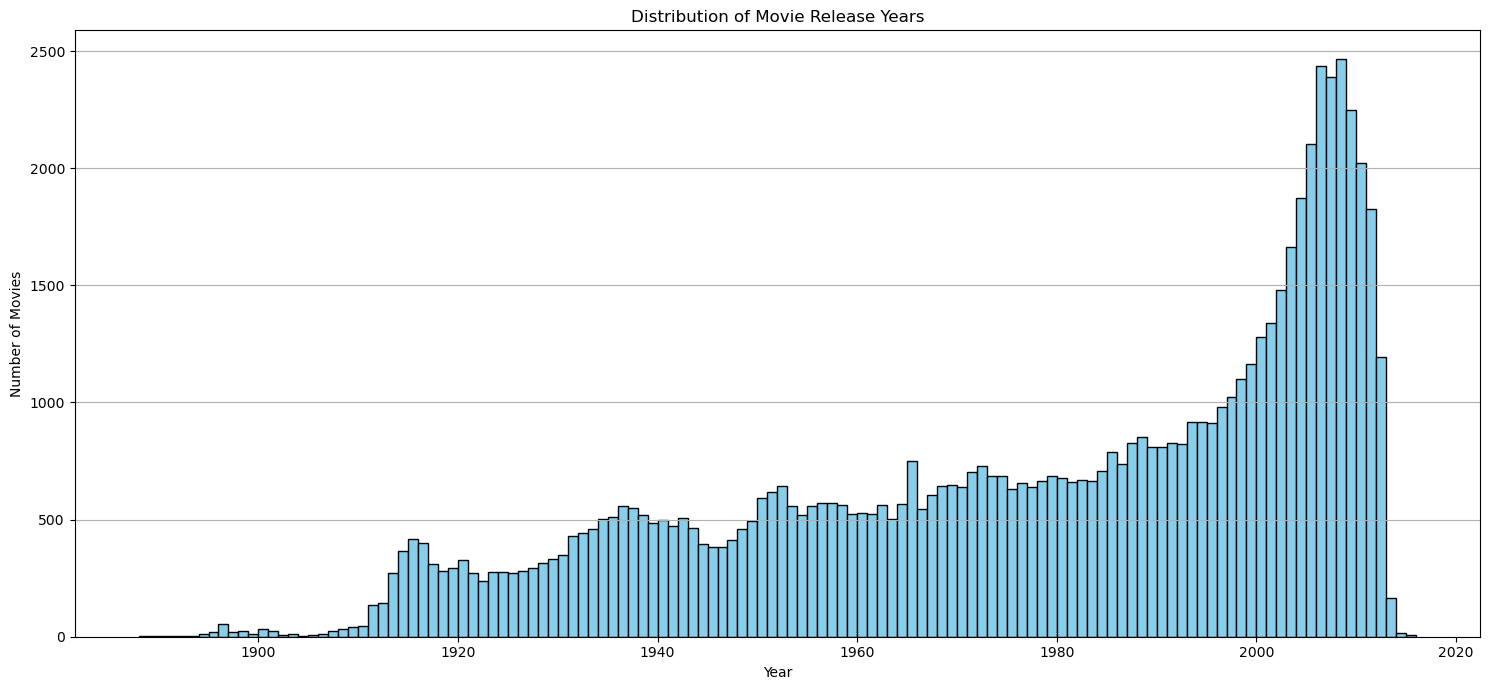

In [7]:
# Convert the 'Movie release date' column to datetime format
movie_metadata['Movie release date'] = pd.to_datetime(movie_metadata['Movie release date'], errors='coerce')

# Extract the year from the release date
movie_metadata['Release year'] = movie_metadata['Movie release date'].dt.year

# Drop movies with missing or invalid release years
movie_metadata_filtered = movie_metadata.dropna(subset=['Release year'])

# Plot histogram of movie release years
plt.figure(figsize=(15, 7))
plt.hist(movie_metadata_filtered['Release year'], bins=range(int(movie_metadata_filtered['Release year'].min()), int(movie_metadata_filtered['Release year'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


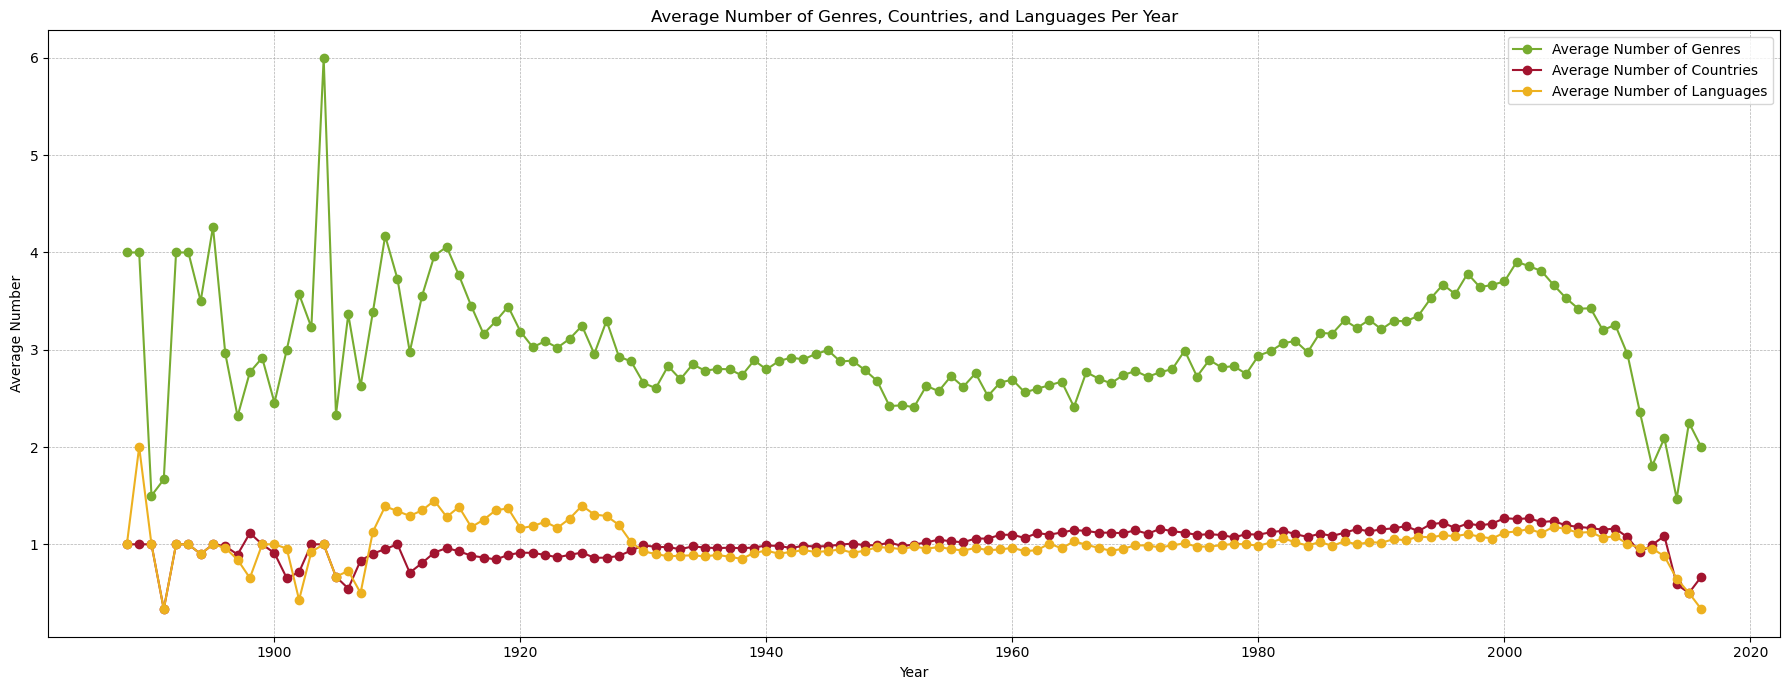

In [8]:
# Group by release year and calculate the average number of genres, countries, and languages for each year
average_values_per_year = movie_metadata.groupby('Release year').agg({
    'Genres': lambda x: x.apply(len).mean(),
    'Countries': lambda x: x.apply(len).mean(),
    'Languages': lambda x: x.apply(len).mean()
}).reset_index()

# Plotting the averages over the years
plt.figure(figsize=(18, 7))

# Plot average number of genres per year
plt.plot(average_values_per_year['Release year'], average_values_per_year['Genres'],
         label='Average Number of Genres', color='#77AC30', marker='o')

# Plot average number of countries per year
plt.plot(average_values_per_year['Release year'], average_values_per_year['Countries'],
         label='Average Number of Countries', color='#A2142F', marker='o')

# Plot average number of languages per year
plt.plot(average_values_per_year['Release year'], average_values_per_year['Languages'],
         label='Average Number of Languages', color='#EDB120', marker='o')

plt.title('Average Number of Genres, Countries, and Languages Per Year')
plt.xlabel('Year')
plt.ylabel('Average Number')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


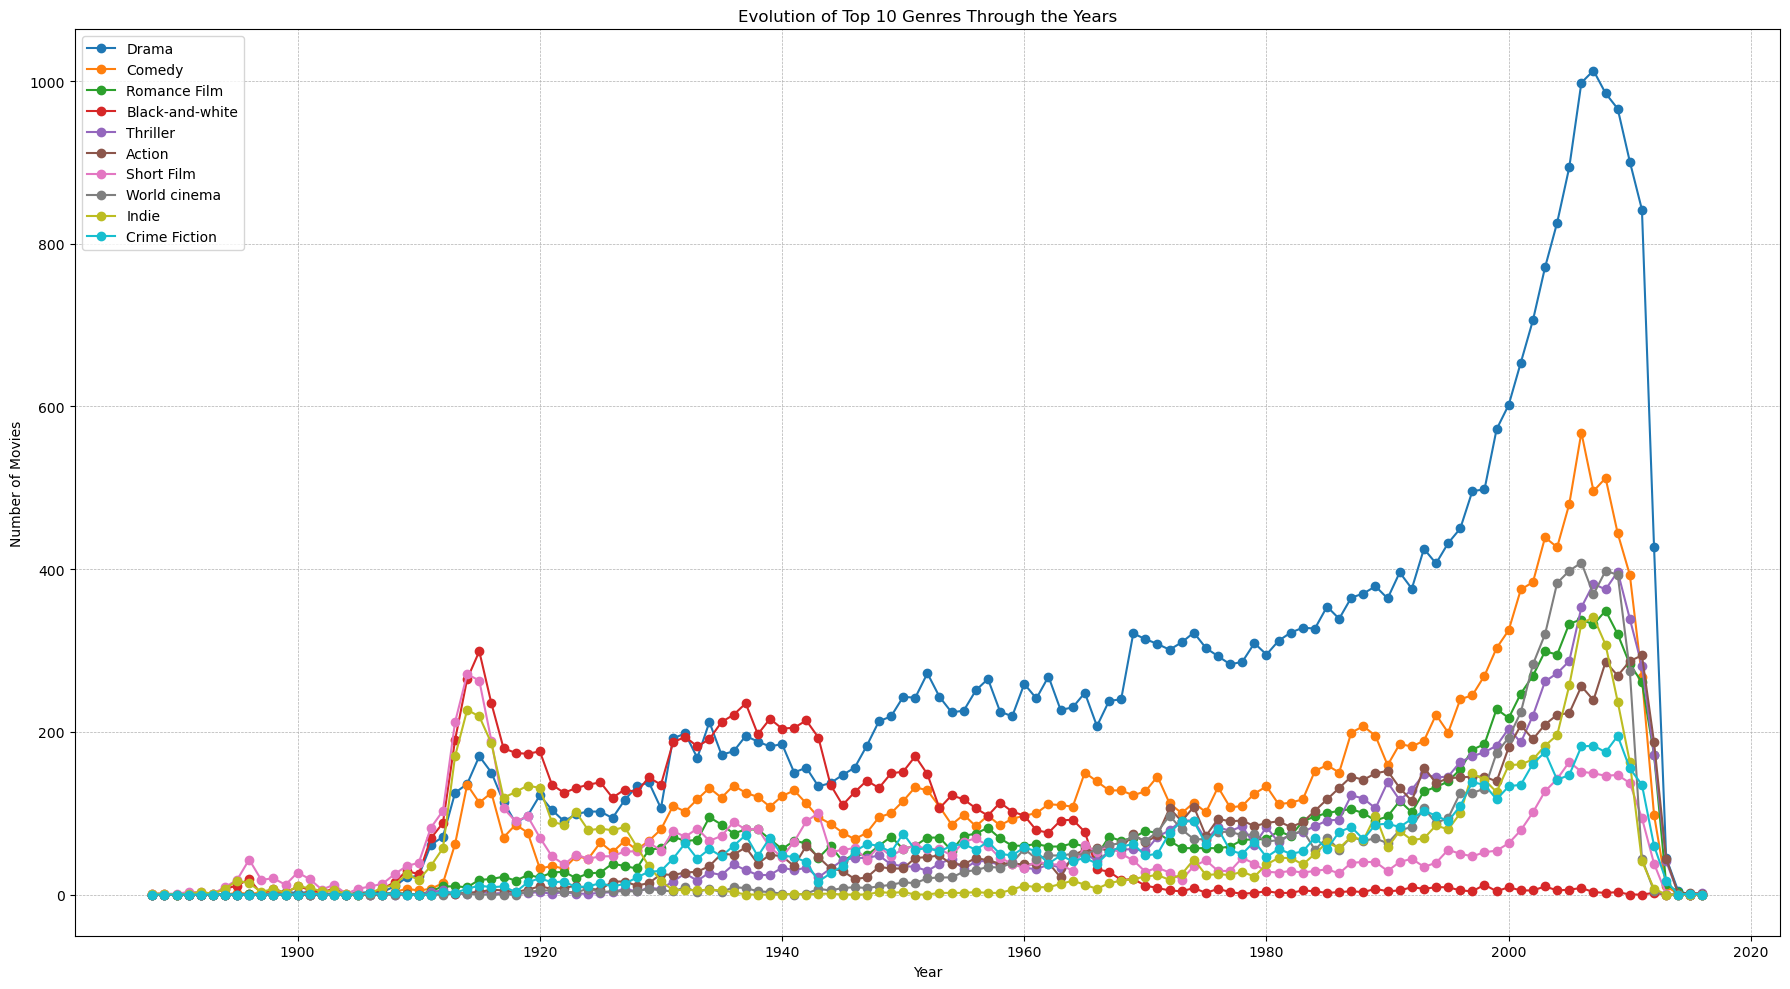

In [9]:
# Flatten the list of genres for all movies and count the occurrences of each genre
all_genres = [genre for sublist in movie_metadata_filtered['Genres']
              for genre in sublist]
genre_counts = Counter(all_genres)

# Select the top 10 most common genres
top_10_genres = [genre for genre, count in genre_counts.most_common(10)]


selected_genres = top_10_genres
selected_genres_counts = [genre_counts[genre] for genre in selected_genres]

# Function to count the occurrence of each genre in a given year
def count_genre_per_year(data, genre):
    return data.apply(lambda x: genre in x).sum()


# Initialize a DataFrame to store the count of each genre per year
genre_evolution = pd.DataFrame(index=sorted(
    movie_metadata_filtered['Release year'].unique()))

# Count the occurrence of each of the top 10 genres per year
for genre in selected_genres:
    genre_evolution[genre] = movie_metadata_filtered['Genres'].groupby(
        movie_metadata_filtered['Release year']).apply(count_genre_per_year, genre)

# Plotting the evolution of the top 10 genres through the years
plt.figure(figsize=(18, 10))

for genre in selected_genres:
    plt.plot(genre_evolution.index,
             genre_evolution[genre], label=genre, marker='o')

plt.title('Evolution of Top 10 Genres Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


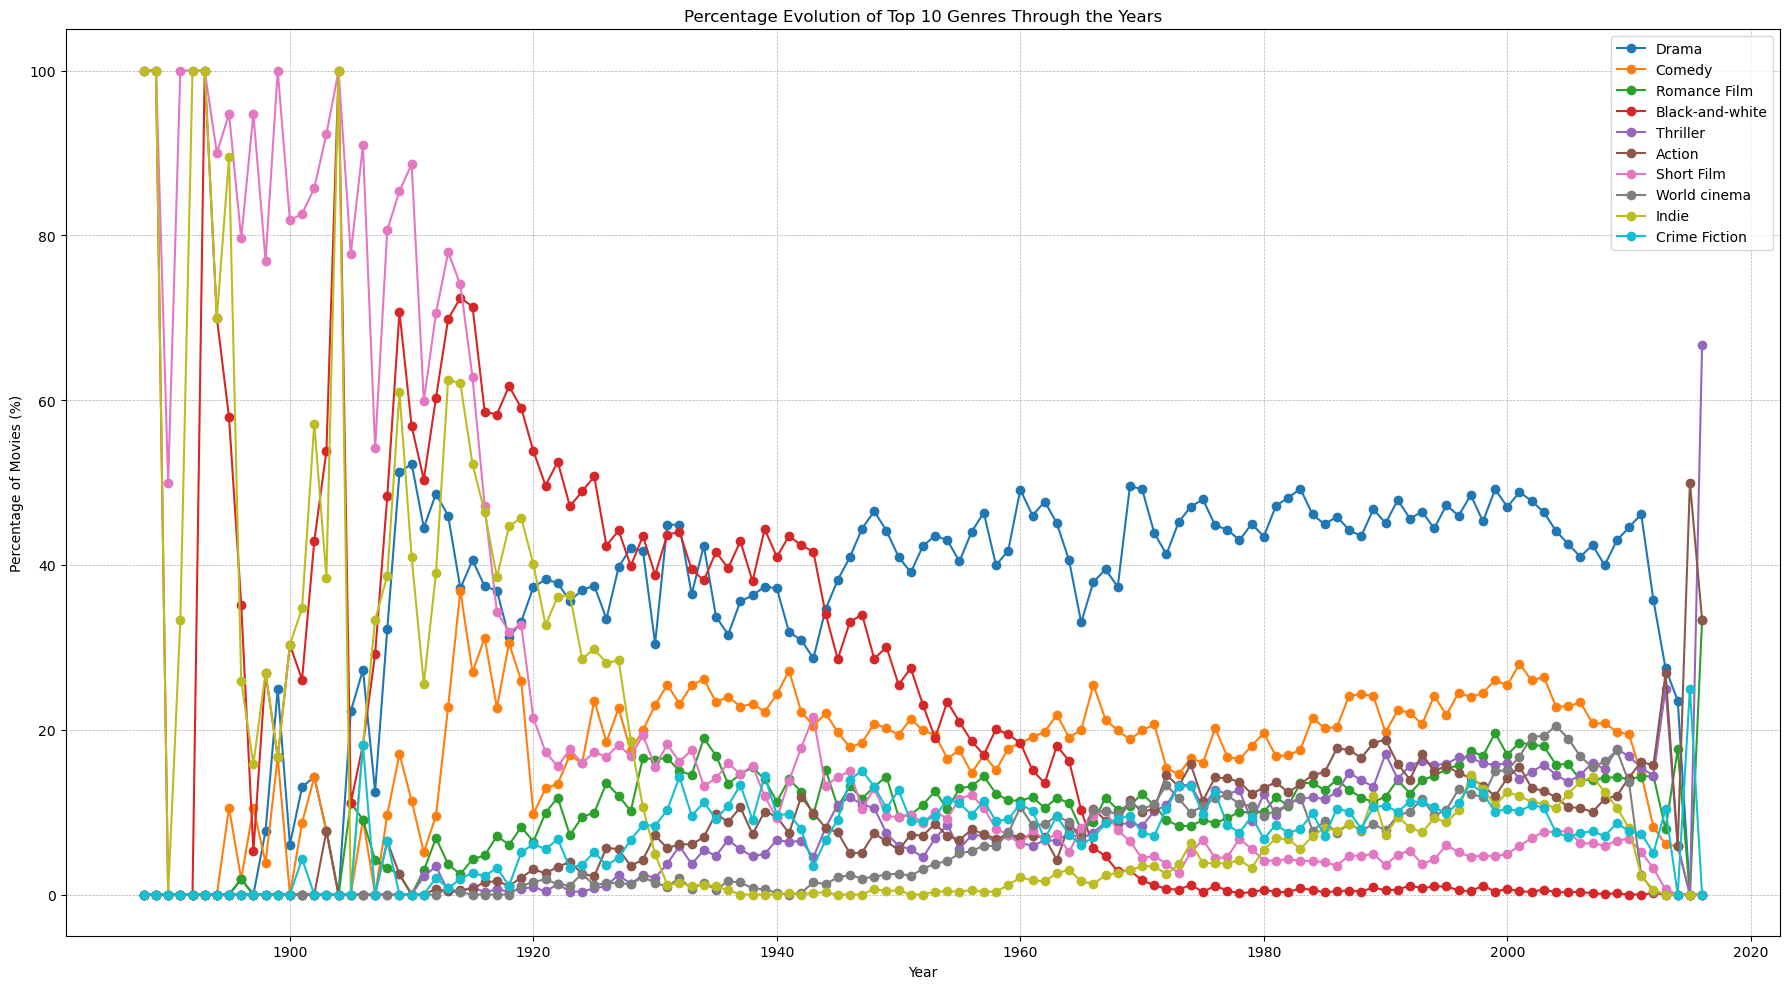

In [10]:
# Calculate the total number of movies released each year
total_movies_per_year = movie_metadata_filtered['Release year'].value_counts(
).sort_index()

# Calculate the percentage of each genre per year
genre_evolution_percentage = genre_evolution.divide(
    total_movies_per_year, axis=0) * 100

# Plotting the percentage evolution of the top 10 genres through the years
plt.figure(figsize=(18, 10))

for genre in selected_genres:
    plt.plot(genre_evolution_percentage.index,
             genre_evolution_percentage[genre], label=genre, marker='o')

plt.title('Percentage Evolution of Top 10 Genres Through the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


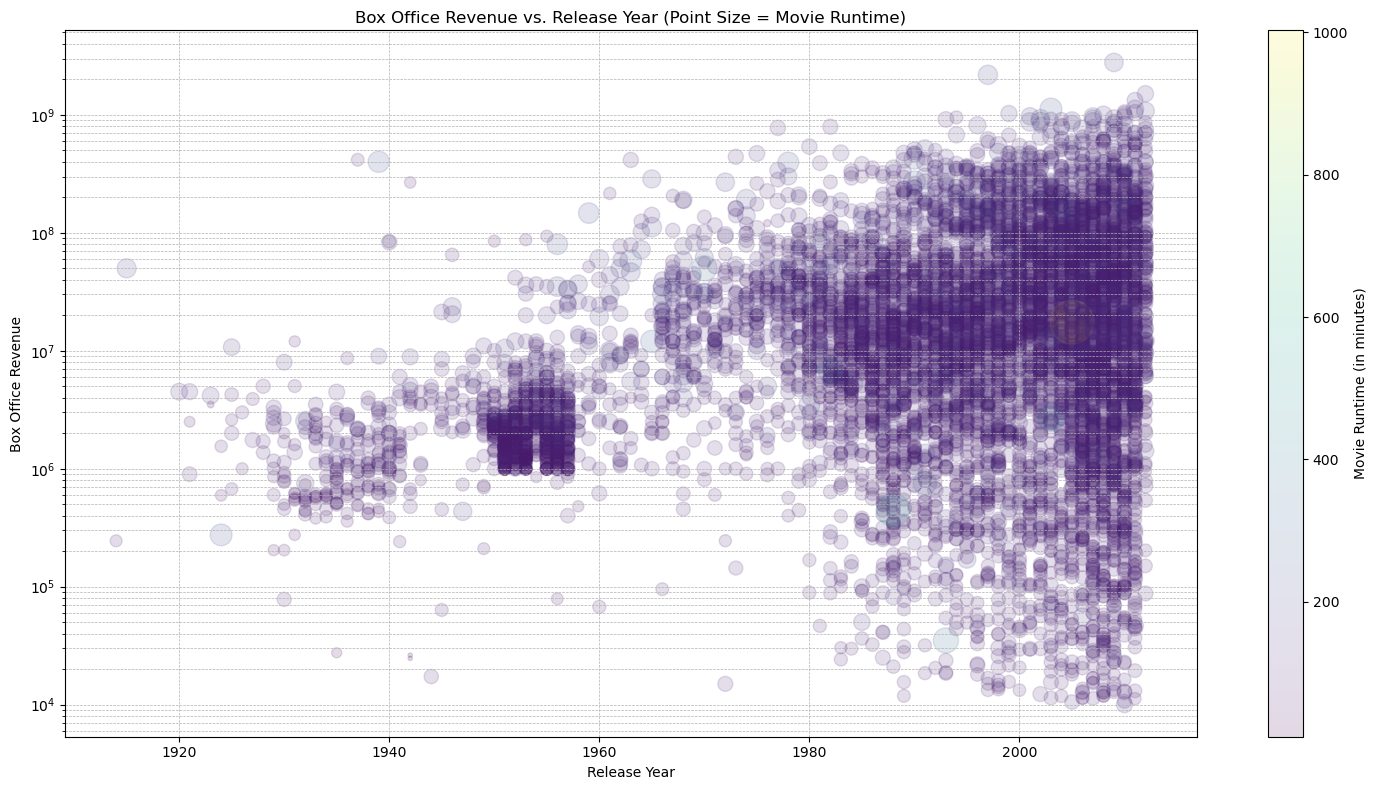

In [11]:
# Scatter plot of Box Office Revenue vs. Release Year with Point Size representing Movie Runtime

# Filter out movies with missing box office revenue or runtime
scatter_data = movie_metadata_filtered.dropna(
    subset=['Movie box office revenue', 'Movie runtime'])

# Plot
plt.figure(figsize=(15, 8))
plt.scatter(scatter_data['Release year'], scatter_data['Movie box office revenue'],
            s=scatter_data['Movie runtime'], alpha=0.15, c=scatter_data['Movie runtime'], cmap='viridis')
plt.yscale('log')
plt.title('Box Office Revenue vs. Release Year (Point Size = Movie Runtime)')
plt.xlabel('Release Year')
plt.ylabel('Box Office Revenue')
plt.colorbar(label='Movie Runtime (in minutes)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


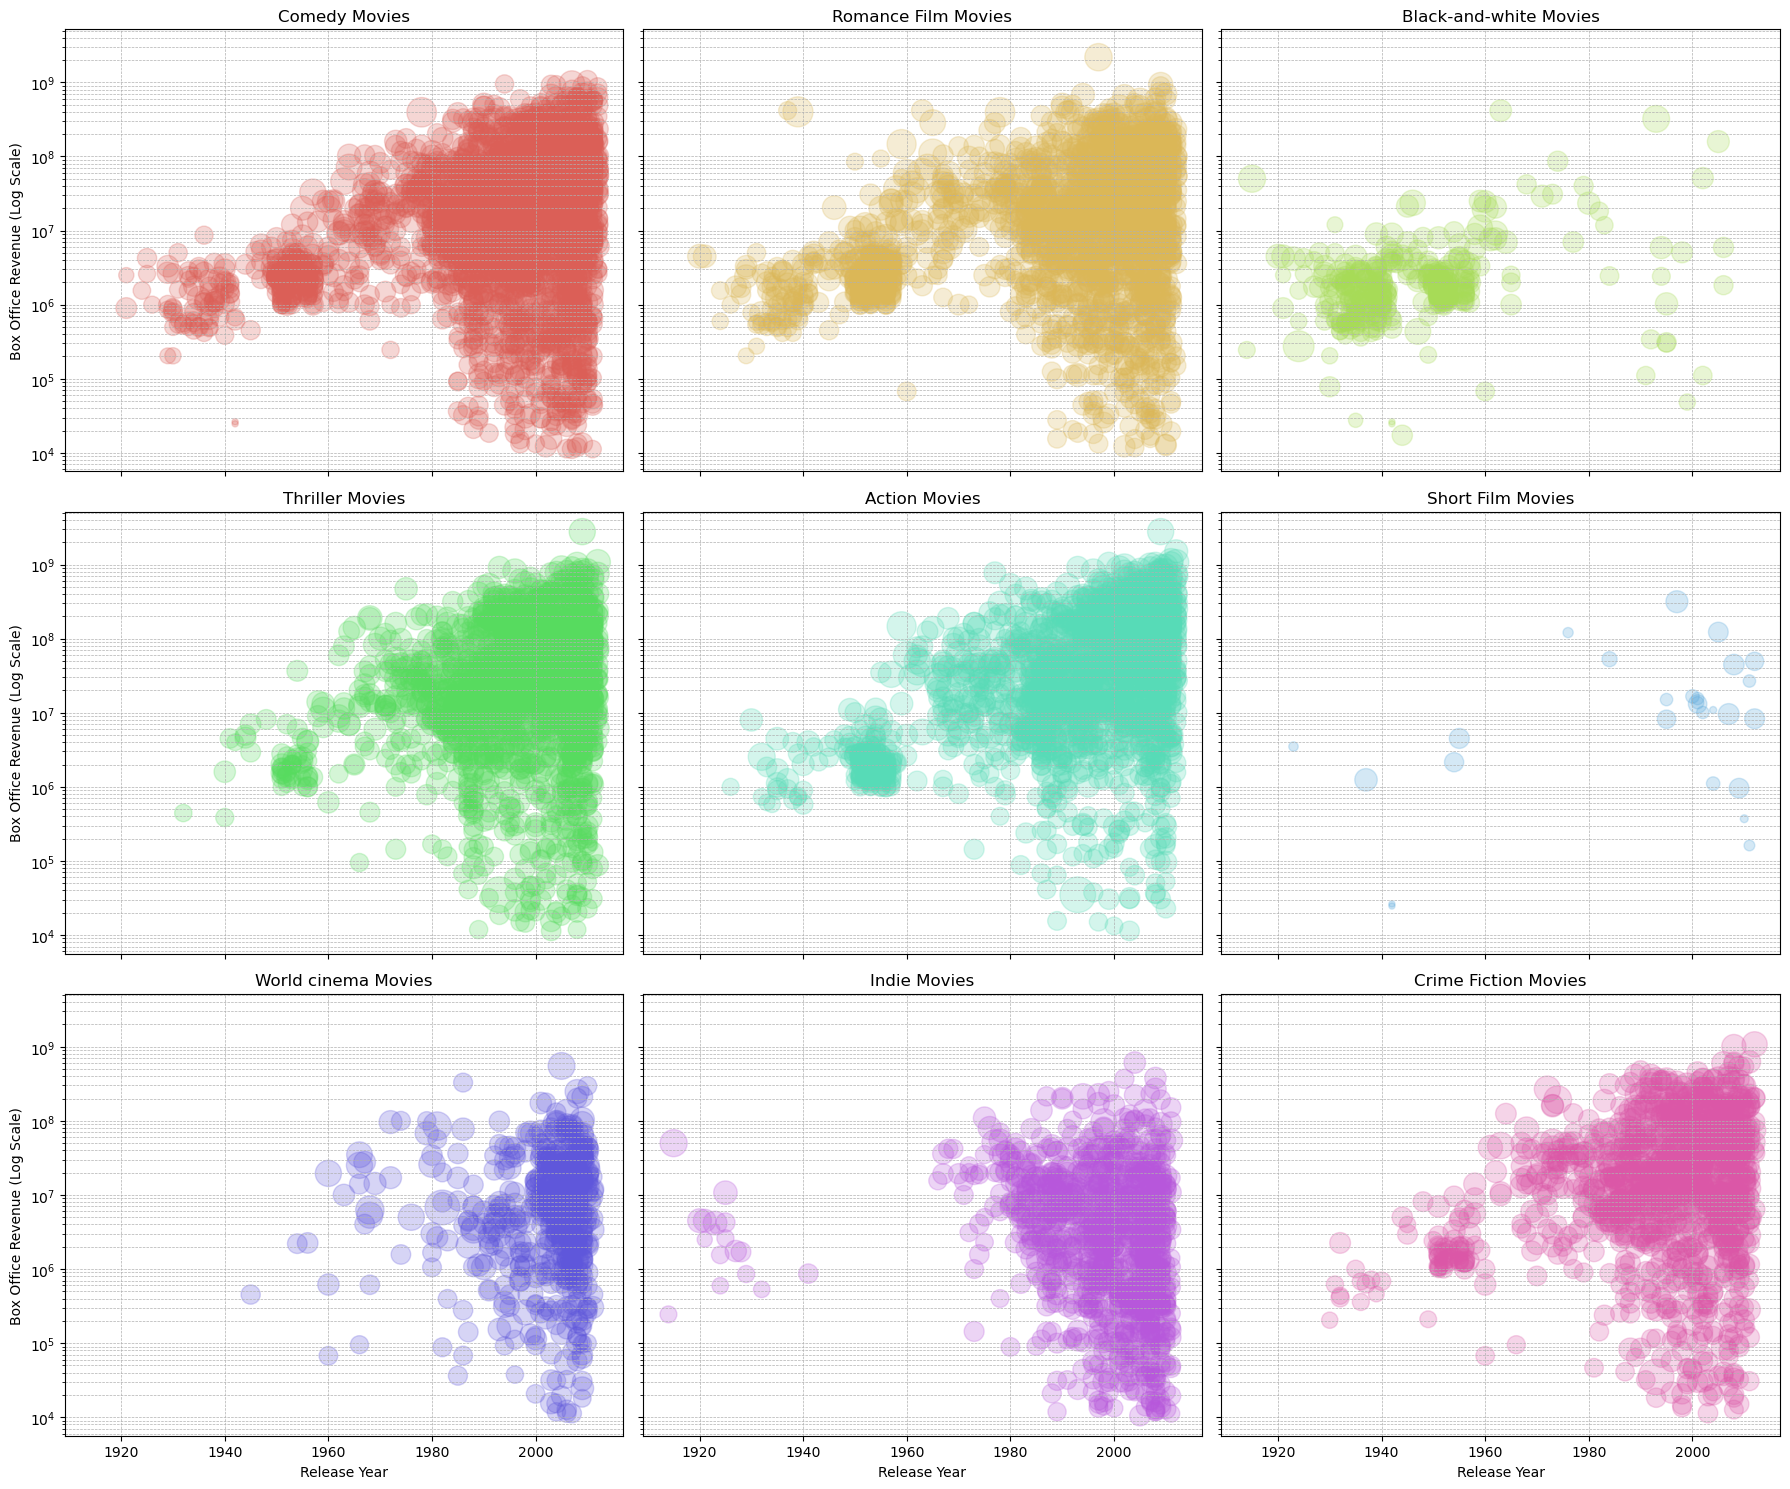

In [12]:
# Selected genres for the subplot grid (excluding Drama)
selected_genres = ['Comedy', 'Romance Film', 'Black-and-white', 'Thriller',
                   'Action', 'Short Film', 'World cinema', 'Indie', 'Crime Fiction']

# Set up the subplot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharex=True, sharey=True)

# Colors for each subplot
colors = sns.color_palette("hls", 9)

for i, genre in enumerate(selected_genres):
    # Filter the data for the current genre
    genre_data = scatter_data[scatter_data['Genres'].apply(
        lambda x: genre in x)]

    # Row and column index for the current subplot
    row = i // 3
    col = i % 3

    # Create the scatter plot for the current genre
    axs[row, col].scatter(genre_data['Release year'], genre_data['Movie box office revenue'],
                          s=genre_data['Movie runtime']*2, alpha=0.25, color=colors[i])
    axs[row, col].set_yscale('log')  # Apply logarithmic scale to y-axis
    axs[row, col].set_title(f'{genre} Movies')
    axs[row, col].set_xlabel('Release Year')
    axs[row, col].set_ylabel('Box Office Revenue (Log Scale)')
    axs[row, col].grid(True, which='both', linestyle='--', linewidth=0.5)

# # Set common labels
# for ax in axs.flat:
#     ax.set(xlabel='X-axis', ylabel='Y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:

# Define the column names for the character metadata
character_metadata_columns = [
    "Wikipedia movie ID", "Freebase movie ID", "Movie release date",
    "Character name", "Actor date of birth", "Actor gender", "Actor height",
    "Actor ethnicity", "Actor name", "Actor age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"
]

# Attempt to load the character metadata again
character_metadata = pd.read_csv('./MovieSummaries/character.metadata.tsv', sep='\t',
                                 header=None, names=character_metadata_columns, encoding='utf-8', error_bad_lines=False)

character_metadata.head()

C:\Users\arist\AppData\Local\Temp\ipykernel_9716\1512902854.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  character_metadata = pd.read_csv('./MovieSummaries/character.metadata.tsv', sep='\t',


Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  Actor height  \
0                    Akooshay          1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard          1974-08-15            F         1.780   
2         Desolation Williams          1969-06-15            M         1.727   
3          Sgt Jericho Butler          1967-09-12            M         1.750   
4             Bashira Kincaid          1977-09-25            F         1.650   

  Actor ethnicity          Actor name  Actor age at movie release  \
0             NaN      Wanda De Jesus                        42.0   
1      /m/044038p  Natasha Henstridge                        27.0   
2         /m/0x67            Ice Cube                        32.0   
3             NaN       Jason Statham                        33.0   
4             NaN         Clea DuVall                        23.0   

  Freebase character/actor map ID Freebase character ID Freebase actor ID  
0                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7  
1                       /m/0jys3m            /m/0bgchn4         /m/0346l4  
2                       /m/0jys3g            /m/0bgchn_        /m/01vw26l  
3                      /m/02vchl6            /m/0bgchnq         /m/034hyc  
4                      /m/02vbb3r            /m/0bgchp9         /m/01y9xg

In [14]:

# Convert the 'Movie release date' column to datetime format
character_metadata['Movie release date'] = pd.to_datetime(
    character_metadata['Movie release date'], errors='coerce')

# Extract the year from the release date
character_metadata['Release year'] = character_metadata['Movie release date'].dt.year

# Drop entries with missing or invalid release years or gender
character_metadata_filtered = character_metadata.dropna(
    subset=['Release year', 'Actor gender'])

gender_numbers = character_metadata_filtered.groupby(
    'Release year')['Actor gender'].value_counts().unstack().fillna(0)

# Group by release year and calculate the proportion of male and female characters for each year
gender_proportions = character_metadata_filtered.groupby(
    'Release year')['Actor gender'].value_counts(normalize=True).unstack().fillna(0)

# Display the first few rows of the gender proportions data
gender_proportions.head()
gender_numbers.head()


Actor gender    F    M
Release year          
1888.0        2.0  2.0
1891.0        0.0  1.0
1893.0        0.0  2.0
1894.0        1.0  3.0
1895.0        0.0  1.0

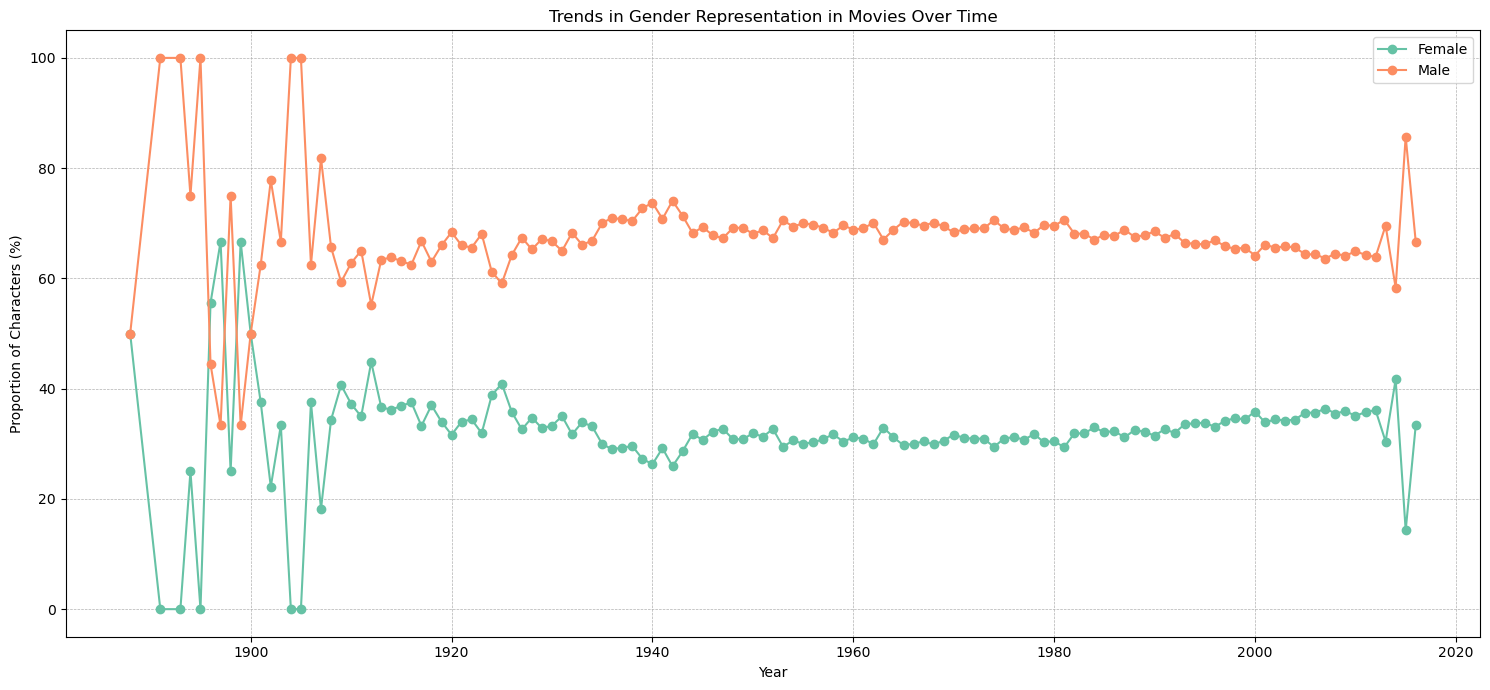

In [15]:
# Plot the trends in gender representation over time
plt.figure(figsize=(15, 7))

# Plot proportion of female characters
plt.plot(gender_proportions.index, gender_proportions['F']*100, label='Female', color=sns.color_palette("Set2")[0], marker='o')

# Plot proportion of male characters
plt.plot(gender_proportions.index, gender_proportions['M']*100, label='Male', color=sns.color_palette("Set2")[1], marker='o')

plt.title('Trends in Gender Representation in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Characters (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

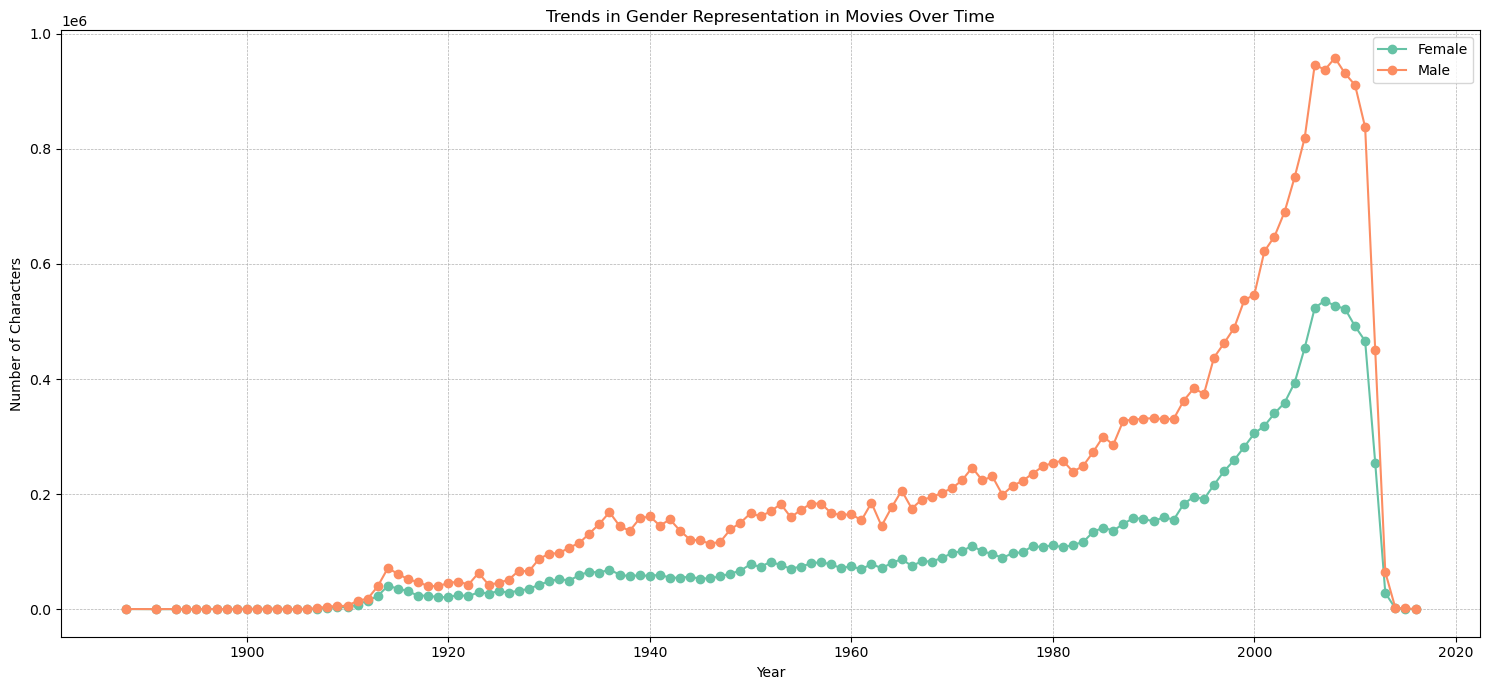

In [16]:
# Plot the trends in gender representation over time
plt.figure(figsize=(15, 7))

# Plot proportion of female characters
plt.plot(gender_numbers.index, gender_numbers['F']*100, label='Female', color=sns.color_palette("Set2")[0], marker='o')

# Plot proportion of male characters
plt.plot(gender_numbers.index, gender_numbers['M']*100,
         label='Male', color=sns.color_palette("Set2")[1], marker='o')

plt.title('Trends in Gender Representation in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

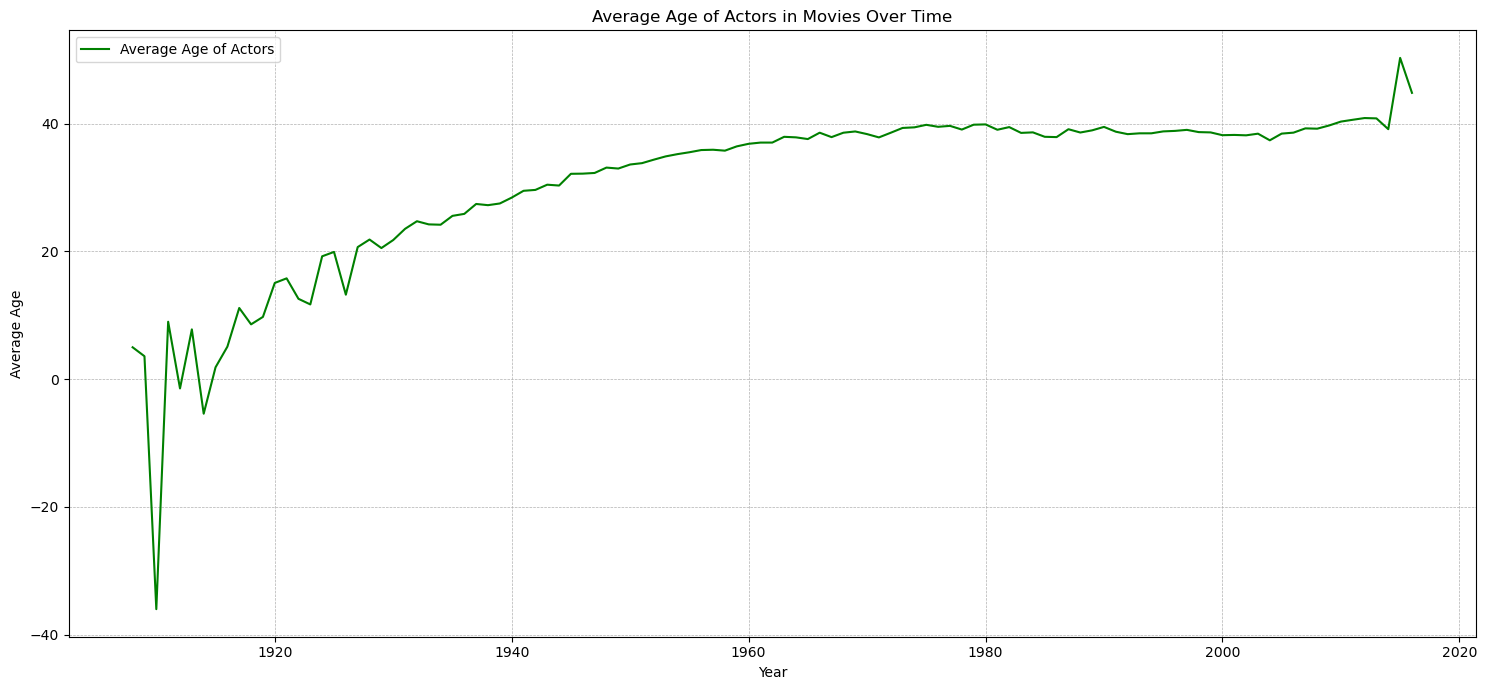

In [17]:
# Drop entries with missing or invalid actor ages
character_age_filtered = character_metadata_filtered.dropna(
    subset=['Actor age at movie release'])

# Group by release year and calculate the average age of actors for each year
average_age_per_year = character_age_filtered.groupby(
    'Release year')['Actor age at movie release'].mean().reset_index()

# Plot the average age of actors over the years
plt.figure(figsize=(15, 7))
plt.plot(average_age_per_year['Release year'], average_age_per_year['Actor age at movie release'],
         label='Average Age of Actors', color='green')
plt.title('Average Age of Actors in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [18]:
character_metadata[character_metadata['Actor age at movie release'] < 0].head()

Wikipedia movie ID Freebase movie ID Movie release date Character name  \
767             15007384        /m/03h4h5p         1934-05-02            NaN   
2286             2553539         /m/07mlsy         1918-04-14            NaN   
3892             5917218         /m/0fdf3y         1965-01-01            NaN   
6666               73930          /m/0jsjm         1924-01-01         Robert   
7188            21242801        /m/05bzjwj         1955-08-07            NaN   

     Actor date of birth Actor gender  Actor height Actor ethnicity  \
767           1963-11-07          NaN           NaN             NaN   
2286          1931-03-25            M           NaN             NaN   
3892          1983-03-03            F          1.75             NaN   
6666          1972-11-07            M          1.80             NaN   
7188          1973-08-01            M          1.79       /m/03ttfc   

           Actor name  Actor age at movie release  \
767     Franck Dubosc                       -29.0   
2286       Tom Wilson                       -12.0   
3892        Kim Smith                       -18.0   
6666     Jason London                       -48.0   
7188  Eduardo Noriega                       -17.0   

     Freebase character/actor map ID Freebase character ID Freebase actor ID  \
767                       /m/0bwb9k3                   NaN        /m/01wlly9   
2286                       /m/0jsqm1                   NaN         /m/0382zh   
3892                      /m/04mb5kf                   NaN         /m/03pjkv   
6666                      /m/01xrptw            /m/02nwfsk         /m/04kdmg   
7188                      /m/0cg2f0f                   NaN         /m/0bkkw0   

      Release year  
767         1934.0  
2286        1918.0  
3892        1965.0  
6666        1924.0  
7188        1955.0

In [19]:
# How many different ethnicities are there?
unique_ethnicities = character_metadata['Actor ethnicity'].unique()

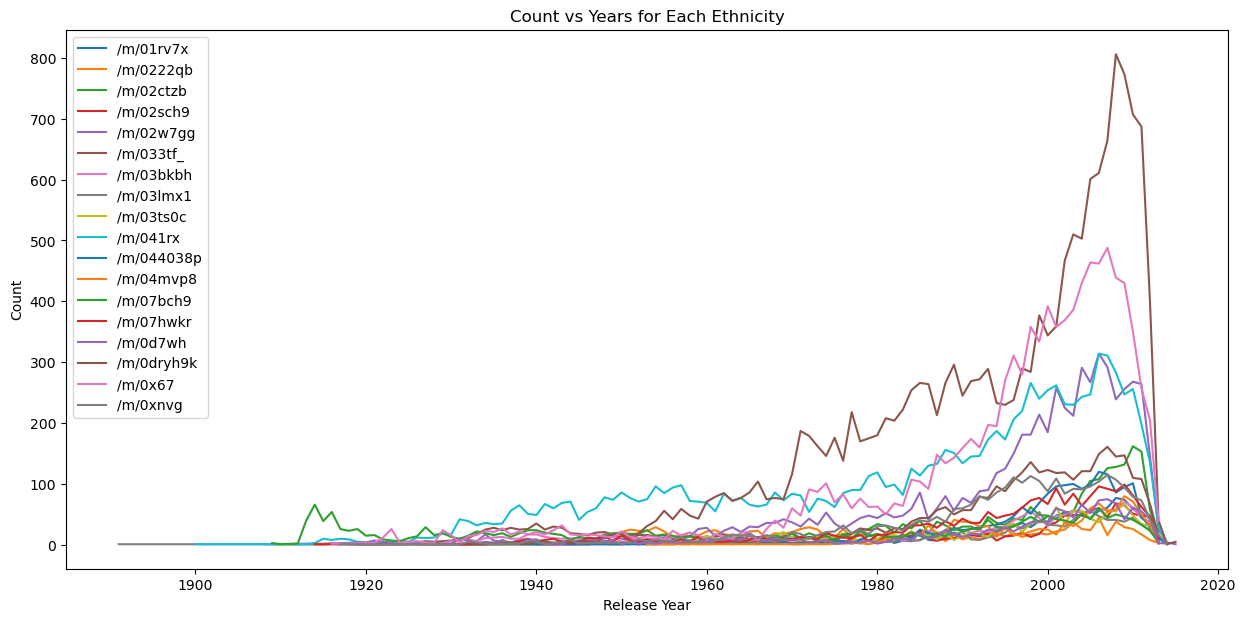

In [20]:
# Plot frequency of each ethnicity present throughout the years
# Group by release year and calculate the average age of actors for each year

ethnicities_filtered = character_metadata.dropna(subset='Actor ethnicity')

ethnicities_per_year = ethnicities_filtered.groupby(
    ['Release year', 'Actor ethnicity']).size().reset_index(name='count')

plt.figure(figsize=(15, 7))

# Get unique ethnicities
ethnicities = ethnicities_per_year['Actor ethnicity'].unique()

total_counts = ethnicities_per_year.groupby('Actor ethnicity')['count'].sum()

ethnicities_to_plot = total_counts[total_counts > 1000].index.tolist()

# Plot one curve for each ethnicity
for ethnicity in ethnicities_to_plot:
    # Filter data for the current ethnicity
    data = ethnicities_per_year[ethnicities_per_year['Actor ethnicity'] == ethnicity]
    
    # Plot curve
    plt.plot(data['Release year'], data['count'], label=ethnicity)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count vs Years for Each Ethnicity')

# Add a legend to distinguish the curves
plt.legend()

plt.show()

In [21]:
ethnicities_per_year.head()

Release year Actor ethnicity  count
0        1891.0       /m/03lmx1      1
1        1894.0       /m/03lmx1      1
2        1896.0       /m/063k3h      1
3        1900.0        /m/041rx      1
4        1901.0       /m/063k3h      1